In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy

In [2]:
from sklearn.model_selection import StratifiedKFold
from scipy import interp

In [3]:
import numpy as np
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

In [4]:
from sklearn import metrics

In [5]:
from sklearn.model_selection import cross_val_score

# data processing

In [174]:
dataset = pd.read_csv(r'D:\test\data.csv',encoding="ISO-8859-1")
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Male                         893 non-null    int64
 1   Female                       893 non-null    int64
 2   Primary school and below     893 non-null    int64
 3   Junior high school           893 non-null    int64
 4   High school and above        893 non-null    int64
 5   Unemployed                   893 non-null    int64
 6   In employment                893 non-null    int64
 7   Urban                        893 non-null    int64
 8   Rural                        893 non-null    int64
 9   Misbehavior,no               893 non-null    int64
 10  Misbehavior,yes              893 non-null    int64
 11  Age of first drug use,<18    893 non-null    int64
 12  Age of first drug use,18-25  893 non-null    int64
 13  Age of first drug use,>25    893 non-null    int64

,Male,Female,Primary school and below,Junior high school,High school and above,Unemployed,In employment,Urban,Rural,"Misbehavior,no",...,"Traumatic events,no","Traumatic events,yes",Unsatisfactory,General satisfaction,Satisfactory,Physical neglect,Emotional abuse,Emotional neglect,Sexual abuse,Relapse
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,...,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,0.522956,0.477044,0.346025,0.409854,0.244121,0.614782,0.385218,0.789474,0.210526,0.135498,...,0.695409,0.304591,0.020157,0.107503,0.872340,10.900336,6.113102,12.974244,5.740202,0.845465
std,0.499753,0.499753,0.475968,0.492082,0.429806,0.486920,0.486920,0.407911,0.407911,0.342447,...,0.460492,0.460492,0.140615,0.309925,0.333897,2.764308,1.855055,6.160449,1.671351,0.361664
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,5.000000,8.000000,5.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,10.000000,5.000000,11.000000,5.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,13.000000,7.000000,18.000000,6.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,15.000000,23.000000,14.000000,1.000000


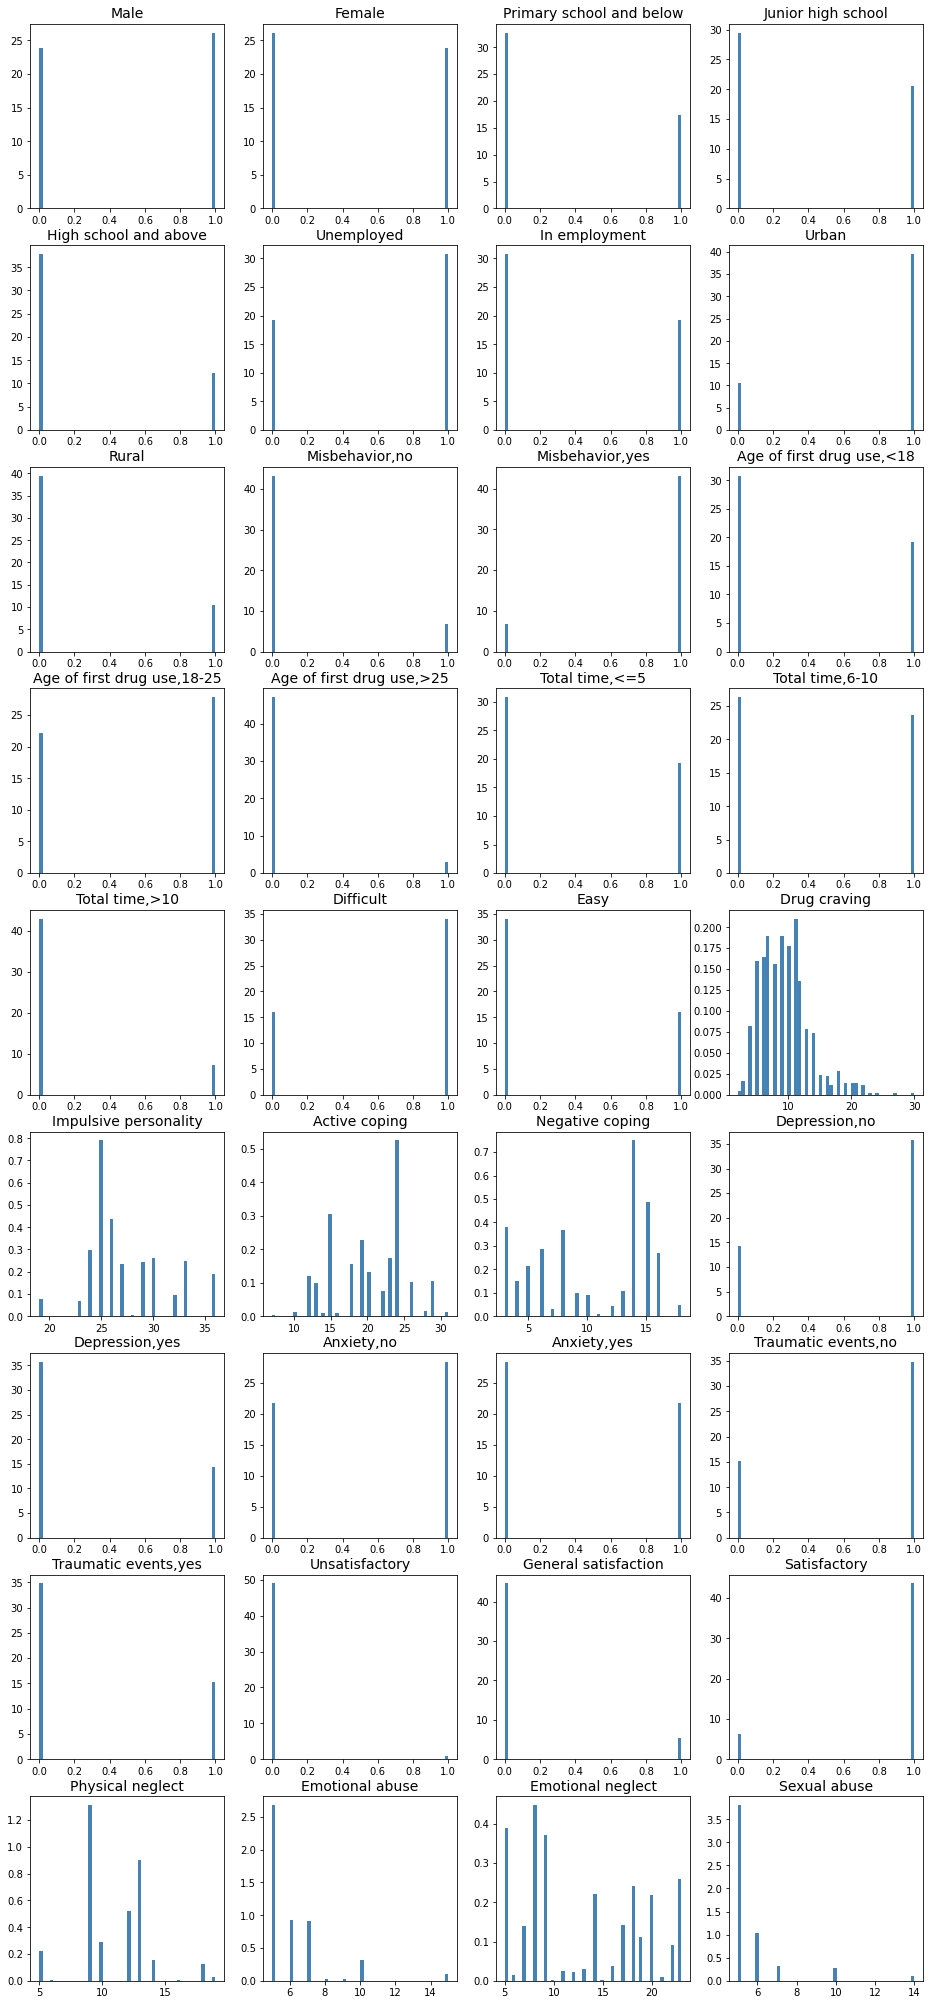

In [7]:
X=dataset.iloc[:,0:-1]
y=dataset.iloc[:,-1]

fig=plt.figure(figsize=(16,36))
for ind in  range(X.shape[1]):
    ax=fig.add_subplot(9,4,ind+1)
    ax.hist(X[X.columns[ind]],density=True,bins=50,color='steelblue',edgecolor='none')
    plt.title(X.columns[ind],fontsize=14)

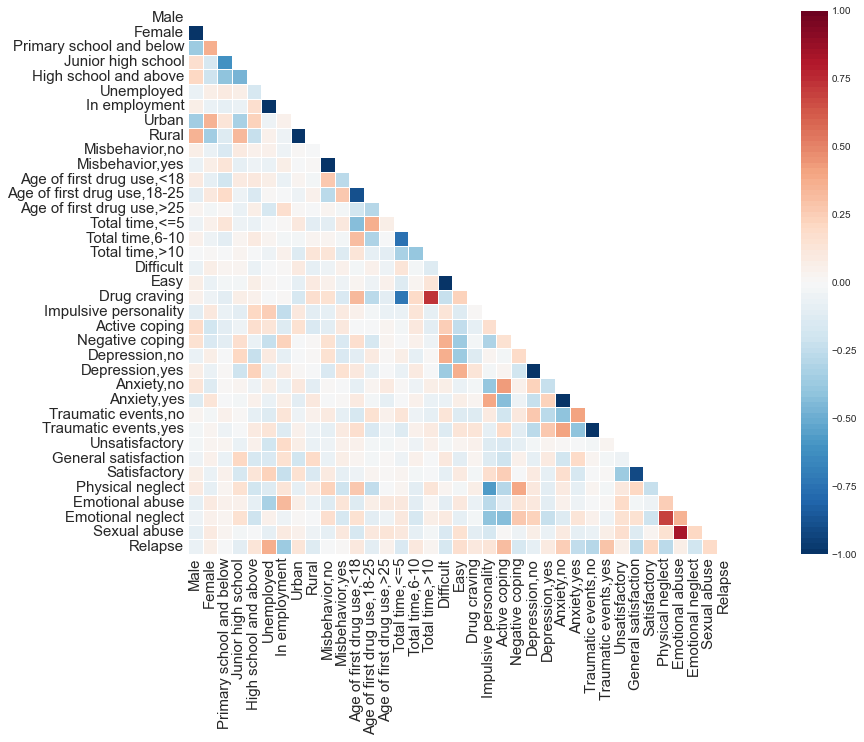

In [8]:
# Create a correlation plot of both datasets.
import seaborn as sns
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10)) 

mask = np.zeros_like(dataset.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("RdBu_r", 100), 
            mask=mask, 
            linewidths=.5);


font1 = {
# 'weight' : 'normal',
'size' : 15,
}
#legend = plt.legend(handles=[A,B],prop=font1)
plt.tick_params(labelsize=15)


plt.xlabel('',fontsize=20)
plt.ylabel('',fontsize=20)
#plt.legend(X)
plt.savefig('Confusion matrix figure.png',dpi=600,bbox_inches="tight")
plt.show()

In [9]:
feat_labels = dataset.columns[:36]

In [10]:
print(feat_labels)

Index(['Male', 'Female', 'Primary school and below', 'Junior high school',
       'High school and above', 'Unemployed', 'In employment', 'Urban',
       'Rural', 'Misbehavior,no', 'Misbehavior,yes',
       'Age of first drug use,<18', 'Age of first drug use,18-25',
       'Age of first drug use,>25', 'Total time,<=5', 'Total time,6-10',
       'Total time,>10', 'Difficult', 'Easy', 'Drug craving',
       'Impulsive personality', 'Active coping', 'Negative coping',
       'Depression,no', 'Depression,yes', 'Anxiety,no', 'Anxiety,yes',
       'Traumatic events,no', 'Traumatic events,yes', 'Unsatisfactory',
       'General satisfaction', 'Satisfactory', 'Physical neglect',
       'Emotional abuse', 'Emotional neglect', 'Sexual abuse'],
      dtype='object')


# Divide the dataset

In [175]:
y = dataset['Relapse']
X = dataset.drop(['Relapse'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [12]:
print(X_test.shape)

(268, 36)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


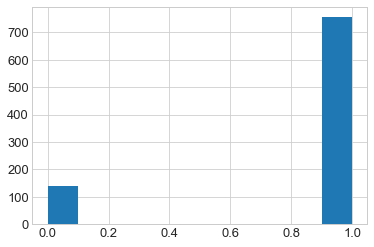

In [13]:
dataset['Relapse'].hist()

font = {'weight': 'normal',
         'size': 15,
         };    
    
plt.legend(prop=font,labelspacing=1);
plt.tick_params(labelsize=13)
plt.savefig('Categorical values.png',dpi=600,bbox_inches="tight")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


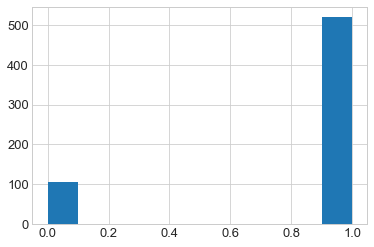

In [14]:
y_train.hist()

plt.legend(prop=font,labelspacing=1);
plt.tick_params(labelsize=13)
plt.savefig('Categorical values after dividing the dataset.png',dpi=600,bbox_inches="tight")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


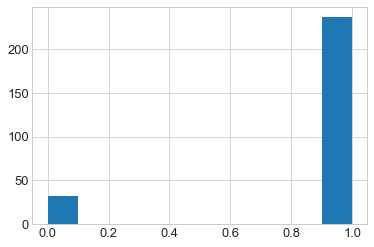

In [15]:
y_test.hist()

plt.legend(prop=font,labelspacing=1);
plt.tick_params(labelsize=13)
plt.savefig('The categorical value of the test set.png',dpi=600,bbox_inches="tight")
plt.show()

# SMOTE-Data enhancements

In [16]:
from imblearn.over_sampling import SMOTE

In [176]:
X_resample_train, y_resample_train = SMOTE().fit_resample(X_train, y_train)
print ('The number of transactions after resampling : ' + str(len(X_resample_train)))
print ('Is the number of fraudulent transaction is equal to the number of normal tansactions? ' + str(sum(y_resample_train == 0) == sum(y_resample_train == 1)))

The number of transactions after resampling : 1038
Is the number of fraudulent transaction is equal to the number of normal tansactions? True


In [18]:
from collections import Counter
print('Before SMOTE:',Counter(y_train))
print('After SMOTE:',Counter(y_resample_train))

Before SMOTE: Counter({1: 519, 0: 106})
After SMOTE: Counter({1: 519, 0: 519})


In [19]:
print(X_resample_train.shape)

(1038, 36)


In [177]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_resample_train)
X_resample_train = scaler.transform(X_resample_train)  
X_test = scaler.transform(X_test) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


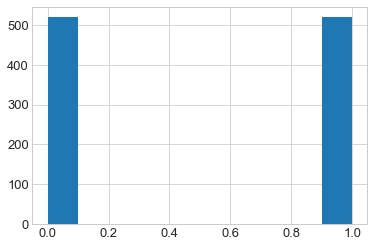

In [21]:
y_resample_train.hist()

plt.legend(prop=font,labelspacing=1);
plt.tick_params(labelsize=13)
plt.savefig('The classification value after the SMOTE.png',dpi=600,bbox_inches="tight")
plt.show()

# Data presentation

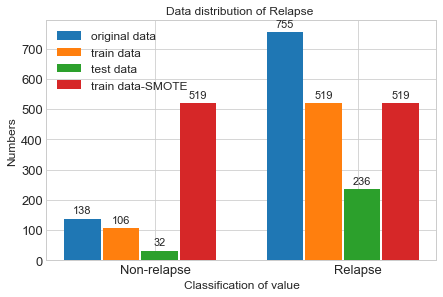

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

config = {
            "font.family": 'serif',
            "font.size": 12,
            "mathtext.fontset": 'stix',
            "font.serif": ['SimSun'],
         }
labels = ['Non-relapse', 'Relapse']
a = [138, 755]
b = [106, 519]
c = [32, 236]
d = [519, 519]
x = np.arange(len(labels))  
width = 0.18  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*2, a, width, label='original data')
rects2 = ax.bar(x - width+0.01, b, width, label='train data')
rects3 = ax.bar(x + 0.02, c, width, label='test data')
rects4 = ax.bar(x + width+ 0.03, d, width, label='train data-SMOTE')

ax.set_title('Data distribution of Relapse ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=11)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
font1 = {'family':'Arial' ,
         'weight': 'normal',
         'size': 12,
         };   

plt.tick_params(labelsize=13)
plt.legend(prop=font1)
plt.xlabel('Classification of value',font1)
plt.ylabel('Numbers',font1)
plt.savefig('data.png',dpi=600,bbox_inches="tight")
plt.show()

# Machine learning models

In [23]:
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# LR

# Optimal parameters

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
 
#Parameters that need to be tuned
penaltys=['l1','l2']
Cs=[0.001,0.01,0.1,1,10,100]
kernel = ['linear','lbfgs','saga']
#A tuned collection of parameters
tuned_parameters=dict(penalty=penaltys,C=Cs, solver=kernel)
 
lr=LogisticRegression()
grid=GridSearchCV(lr,tuned_parameters,cv=10,scoring='accuracy',
    n_jobs=2)
grid.fit(X_resample_train,y_resample_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['linear', 'lbfgs', 'saga']},
             scoring='accuracy')

In [26]:
lr=LogisticRegression()

In [49]:
parameters = {'solver':['linear','lbfgs','saga'], 'C':[0.001,0.01,0.1,1,10,100], 'penalty': ['l1', 'l2']}
grid_lr=GridSearchCV(lr,param_grid=parameters,scoring='accuracy',cv=10)
grid_lr.fit(X_resample_train,y_resample_train)

# 查看最佳分数、最佳参数
grid_lr.best_score_
grid_lr.best_params_
# 获取最佳模型
best_model=grid_lr.best_estimator_
# 利用最佳模型进行预测
y_pre_log=grid_lr.predict(X_test)
accuracy=accuracy_score(y_test,y_pre_log)
print("accuracy={}".format(accuracy))
print("params={}".format(grid_lr.best_params_))

accuracy=0.7861194029850746
params={'C': 10, 'penalty': 'l2', 'solver': 'liblinear' ,'dual': 'False'}


# test

In [139]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print('accuracy:%.3f'%accuracy_score(y_true=y_test,y_pred=y_pre_log))
print('Precision:%.3f'%precision_score(y_true=y_test,y_pred=y_pre_log))
print('recall_score:%.3f'%recall_score(y_true=y_test,y_pred=y_pre_log))
print('f1_score:%.3f'%f1_score(y_true=y_test,y_pred=y_pre_log))

accuracy:0.786
Precision:0.961
recall_score:0.806
f1_score:0.872


# AUC

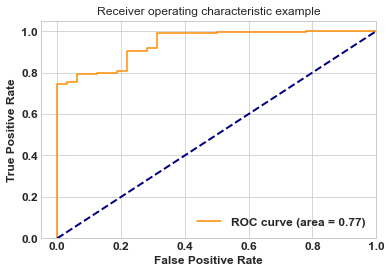

In [812]:
fpr1,tpr1, thresholds = roc_curve(y_test,grid_lr.predict_proba(X_test)[:,1])

roc_auc1 = auc(fpr1, tpr1)
plt.plot(fpr1,tpr1,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('Receiver operating characteristic example',fontsize=12)
plt.legend(loc="lower right",fontsize=12)
plt.savefig('LR_test_ROC.jpg',dpi=800)
plt.show()

# confusion_matrix

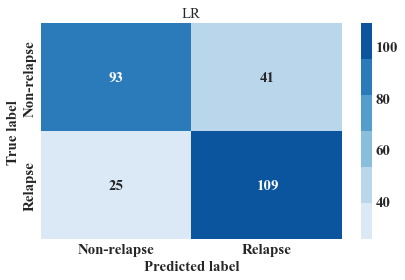

In [575]:
import numpy as np
np.set_printoptions(suppress=True)
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))

plt.rc('font', family='Times New Roman')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

cn = confusion_matrix(y_test, grid_lr.predict(X_test))

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

annot_kws={"fontsize":15}
h = sns.heatmap(cn,fmt="d",cmap = sns.color_palette("Blues"),annot_kws={"fontsize":15},xticklabels=['Non-relapse','Relapse'], yticklabels=['Non-relapse','Relapse'], annot=True)

cbar = h.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Predicted label",fontsize=15)
plt.ylabel("True label",fontsize=15)
plt.title("LR",fontdict={'size': 15})
plt.tight_layout()
plt.savefig('LR_confusion_matrix.png',dpi=600,bbox_inches="tight")
plt.show()

# SVM

# Optimal parameters

In [138]:
svc_classifier = SVC()

parameters = {'kernel':('linear','poly', 'rbf'), 'C':[1,5, 10], 'Probability':[1,3,5,6], 'shrinking':('True', 'False')}

grid_svm=GridSearchCV(svc_classifier,param_grid=parameters,scoring='accuracy',cv=10)
grid_svm.fit(X_resample_train,y_resample_train)

# View the best scores, best parameters
grid_svm.best_score_
grid_svm.best_params_
# Get the best model
best_model=grid_svm.best_estimator_
# Make predictions with the best model
y_pre_svm=grid_svm.predict(X_test)
accuracy=accuracy_score(y_test,y_pre_svm)
print("accuracy={}".format(accuracy))
print("params={}".format(grid_svm.best_params_))

accuracy=0.7037014925373134
params={'kernel': 'linear', 'C': 10, 'Probability': 3, 'shrinking': 'False'}


# test

In [140]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print('accuracy:%.3f'%accuracy_score(y_true=y_test,y_pred=y_pre_svm))
print('Precision:%.3f'%precision_score(y_true=y_test,y_pred=y_pre_svm))
print('recall_score:%.3f'%recall_score(y_true=y_test,y_pred=y_pre_svm))
print('f1_score:%.3f'%f1_score(y_true=y_test,y_pred=y_pre_svm))

accuracy:0.703
Precision:0.951
recall_score:0.694
f1_score:0.807


# AUC

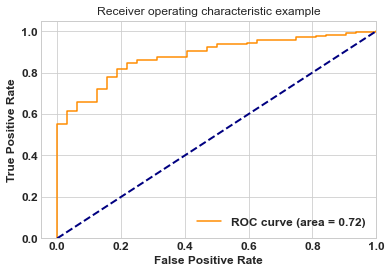

In [813]:
fpr2,tpr2, thresholds = roc_curve(y_test,grid_svm.predict_proba(X_test)[:,1])

roc_auc2 = auc(fpr2, tpr2)
plt.plot(fpr2,tpr2,color='darkorange',label='ROC curve (area = %0.2f)' % 0.72)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('Receiver operating characteristic example',fontsize=12)
plt.legend(loc="lower right",fontsize=12)
plt.savefig('SVM_test_ROC.jpg',dpi=800)
plt.show()

# confusion_matrix

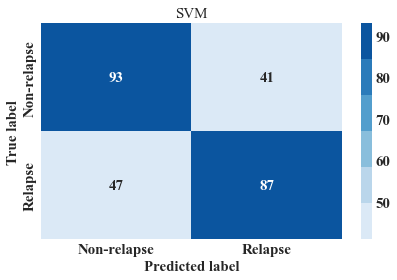

In [574]:
import numpy as np
np.set_printoptions(suppress=True)
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))

plt.rc('font', family='Times New Roman')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

cn = confusion_matrix(y_test, grid_svm.predict(X_test))

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

annot_kws={"fontsize":15}
h = sns.heatmap(cn,fmt="d",cmap = sns.color_palette("Blues"),annot_kws={"fontsize":15},xticklabels=['Non-relapse','Relapse'], yticklabels=['Non-relapse','Relapse'], annot=True)

cbar = h.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Predicted label",fontsize=15)
plt.ylabel("True label",fontsize=15)
plt.title("SVM",fontdict={'size': 15})
plt.tight_layout()
plt.savefig('SVM_confusion_matrix.png',dpi=600,bbox_inches="tight")
plt.show()

# DT

# Optimal hyperparameters

In [475]:
dt_classifier = DecisionTreeClassifier()

parameters = {'criterion': ('gini', 'entrop'), 'splitter':('best','random'), 'Max_depth':[1, 30,50,100]}

grid_dt=GridSearchCV(dt_classifier,param_grid=parameters,scoring='accuracy',cv=10)
grid.fit(X_resample_train,y_resample_train)

# View the best scores, best parameters
grid_dt.best_score_
grid_dt.best_params_
# Get the best model
best_model=grid_dt.best_estimator_
# Make predictions with the best model
y_pre_dt=grid_dt.predict(X_test)
accuracy=accuracy_score(y_test,y_pre_dt)
print("accuracy={}".format(accuracy))
print("params={}".format(grid_dt.best_params_))

accuracy=0.7835912924330162
params={'criterion': 'gini', 'splitter': best, 'Max_depth': 30}


# test

In [476]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print('accuracy:%.3f'%accuracy_score(y_true=y_test,y_pred=y_pre_dt))
print('Precision:%.3f'%precision_score(y_true=y_test,y_pred=y_pre_dt))
print('recall_score:%.3f'%recall_score(y_true=y_test,y_pred=y_pre_dt))
print('f1_score:%.3f'%f1_score(y_true=y_test,y_pred=y_pre_dt))

accuracy:0.782
Precision:0.971
recall_score:0.749
f1_score:0.853


# AUC

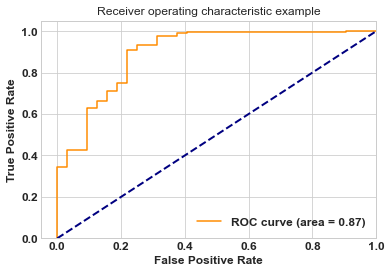

In [809]:
fpr3,tpr3, thresholds = roc_curve(y_test,grid_dt.predict_proba(X_test)[:,1])

roc_auc3 = auc(fpr3, tpr3)
plt.plot(fpr3,tpr3,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('Receiver operating characteristic example',fontsize=12)
plt.legend(loc="lower right",fontsize=12)
plt.savefig('DT_test_ROC.jpg',dpi=600)
plt.show()

# confusion_matrix

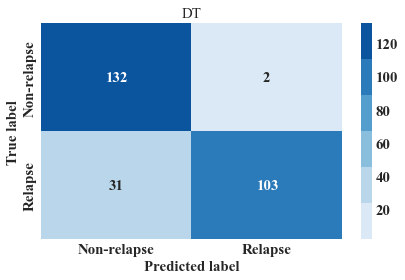

In [573]:
#混淆矩阵
import numpy as np
np.set_printoptions(suppress=True)
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))
# 设置字体格式
plt.rc('font', family='Times New Roman')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

cn = confusion_matrix(y_test, grid_dt.predict(X_test))

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

annot_kws={"fontsize":15}
h = sns.heatmap(cn,fmt="d",cmap = sns.color_palette("Blues"),annot_kws={"fontsize":15},xticklabels=['Non-relapse','Relapse'], yticklabels=['Non-relapse','Relapse'], annot=True)

cbar = h.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Predicted label",fontsize=15)
plt.ylabel("True label",fontsize=15)
plt.title("DT",fontdict={'size': 15})
plt.tight_layout()
plt.savefig('DT_confusion_matrix.png',dpi=600,bbox_inches="tight")
plt.show()

# RF

# Optimal parameters

In [501]:
rf_classifier = RandomForestClassifier()

parameters = {
    'max_depth': [1,3,5,7,9,10], 'n_estimators': [1,30,50,100,200],  'criterion': ('gini','entrop'), 'random_state: [0,1,2]'}
    
grid_rf=GridSearchCV(rf_classifier,param_grid=parameters,scoring='accuracy',cv=10)
grid_rf.fit(X_resample_train,y_resample_train)

# View the best scores, best parameters
grid_rf.best_score_
grid_rf.best_params_
# Get the best model
best_model=grid_rf.best_estimator_

# Make predictions with the best model
y_pre_rf=grid_rf.predict(X_test)
accuracy=accuracy_score(y_test,y_pre_rf)
print("accuracy={}".format(accuracy))
print("params={}".format(grid_rf.best_params_))

accuracy=0.9913935032799273
params={'max_depth': 5, 'n_estimators': 100, 'criterion': 'gini', 'random_state': 0}


# test

In [502]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print('accuracy:%.3f'%accuracy_score(y_true=y_test,y_pred=y_pre_rf))
print('Precision:%.3f'%precision_score(y_true=y_test,y_pred=y_pre_rf))
print('recall_score:%.3f'%recall_score(y_true=y_test,y_pred=y_pre_rf))
print('f1_score:%.3f'%f1_score(y_true=y_test,y_pred=y_pre_rf))

accuracy:0.991
Precision:0.982
recall_score:0.976
f1_score:0.990


# AUC

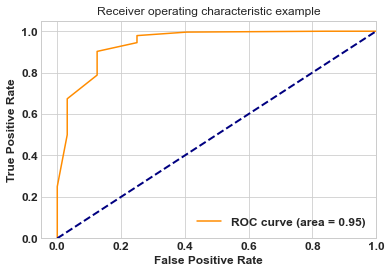

In [808]:
fpr4,tpr4, thresholds = roc_curve(y_test,grid_rf.predict_proba(X_test)[:,1])

roc_auc4 = auc(fpr4, tpr4)
plt.plot(fpr4,tpr4,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('Receiver operating characteristic example',fontsize=12)
plt.legend(loc="lower right",fontsize=12)
plt.savefig('RF_test0_ROC.jpg',dpi=800)
plt.show()

# confusion_matrix

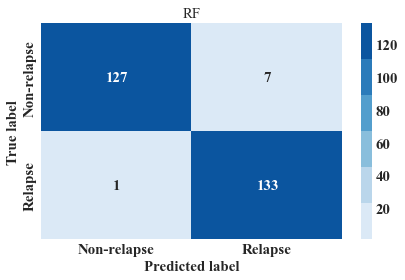

In [572]:
import numpy as np
np.set_printoptions(suppress=True)
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))

plt.rc('font', family='Times New Roman')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

cn = confusion_matrix(y_test, grid_rf.predict(X_test))

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

annot_kws={"fontsize":15}
h = sns.heatmap(cn,fmt="d",cmap = sns.color_palette("Blues"),annot_kws={"fontsize":15},xticklabels=['Non-relapse','Relapse'], yticklabels=['Non-relapse','Relapse'], annot=True)

cbar = h.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Predicted label",fontsize=15)
plt.ylabel("True label",fontsize=15)
plt.title("RF",fontdict={'size': 15})
plt.tight_layout()
plt.savefig('RF_confusion_matrix.png',dpi=600,bbox_inches="tight")
plt.show()

# ANN

# activation

In [578]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras import models
from keras import layers
from keras import optimizers
from keras.wrappers import scikit_learn

def create_model(activation='relu'):
    model = models.Sequential()
    model.add(layers.Dense(30, activation=activation,input_shape=(36,)))
    model.add(layers.Dense(30, activation="relu"))
    model.add(layers.Dense(30, activation="relu"))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    return model

# create model
model = scikit_learn.KerasClassifier(build_fn=create_model, epochs=20, batch_size=8, verbose=0)

# create parameters
activation = ['relu', 'tanh', 'softmax', 'linear', 'sigmoid']

# create GridSearchCV，and training
parameters = dict(activation=activation)
grid_ANN = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=1)
grid_ANN_result = grid_ANN.fit(X_resample_train,y_resample_train)

print('Best: {} using {}'.format(grid_ANN_result.best_score_, grid_ANN_result.best_params_))
means = grid_ANN_result.cv_results_['mean_test_score']
stds = grid_ANN_result.cv_results_['std_test_score']
params = grid_ANN_result.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))

Best: 0.9416000080108643 using {'activation': 'relu'}
0.941600 (0.059135) with: {'activation': 'relu'}
0.912000 (0.044398) with: {'activation': 'tanh'}
0.846400 (0.043052) with: {'activation': 'softmax'}
0.921600 (0.023406) with: {'activation': 'linear'}
0.832000 (0.028171) with: {'activation': 'sigmoid'}


# solver

In [579]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras import models
from keras import layers
from keras import optimizers
from keras.wrappers import scikit_learn

def create_model(optimizer='adam'):
    model = models.Sequential()
    model.add(layers.Dense(30, activation=activation,input_shape=(36,)))
    model.add(layers.Dense(30, activation="relu"))
    model.add(layers.Dense(30, activation="relu"))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
    return model

# create model
model = scikit_learn.KerasClassifier(build_fn=create_model, epochs=20, batch_size=8, verbose=0)

# create parameters
optimizer = ['sgd', 'lbfgs', 'adam']

# create GridSearchCV，and training
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_resample_train,y_resample_train)

print('Best: {} using {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))

Best: 0.9244000005722046 using {'optimizer': 'adam'}
0.862400 (0.022853) with: {'optimizer': 'sgd'}
nan (nan) with: {'optimizer': 'lbfgs'}
0.924400 (0.041229) with: {'optimizer': 'adam'}


# layers

In [580]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras import models
from keras import layers
from keras import optimizers
from keras.wrappers import scikit_learn

def create_model(num_neurons=1):
    # create model
    model = models.Sequential()
    model.add(layers.Dense(30, activation=activation,input_shape=(36,)))
    model.add(layers.Dense(30, activation="relu"))
    model.add(layers.Dense(30, activation="relu"))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    return model

# create model
model = scikit_learn.KerasClassifier(build_fn=create_model, epochs=20, batch_size=8, verbose=0)

# create parameters
num_neurons = [10, 30, 50, 70]

# create GridSearchCV，and training
param_grid = dict(num_neurons=num_neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_resample_train,y_resample_train)

print('Best: {} using {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))

Best: 0.9368333333333334 using {'num_neurons': 50}
0.651042 (0.024774) with: {'num_neurons': 10}
0.857812 (0.019918) with: {'num_neurons': 30}
0.936833 (0.038450) with: {'num_neurons': 50}
0.869531 (0.027251) with: {'num_neurons': 70}


# test

In [586]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(layers.Dense(30, activation=activation,input_shape=(36,)))
model.add(layers.Dense(30, activation="relu"))
model.add(layers.Dense(30, activation="relu"))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_resample_train, y_resample_train,epochs=50)

Epoch 1/50
33/33 [==============================] - 1s 1ms/step - loss: 0.7122 - accuracy: 0.5453
Epoch 2/50
33/33 [==============================] - 0s 1ms/step - loss: 0.6710 - accuracy: 0.5809
Epoch 3/50
33/33 [==============================] - 0s 1ms/step - loss: 0.6414 - accuracy: 0.6349
Epoch 4/50
33/33 [==============================] - 0s 1ms/step - loss: 0.6142 - accuracy: 0.7062
Epoch 5/50
33/33 [==============================] - 0s 1ms/step - loss: 0.5932 - accuracy: 0.7360
Epoch 6/50
33/33 [==============================] - 0s 1ms/step - loss: 0.5723 - accuracy: 0.7948
Epoch 7/50
33/33 [==============================] - 0s 1ms/step - loss: 0.5513 - accuracy: 0.8189
Epoch 8/50
33/33 [==============================] - 0s 1ms/step - loss: 0.5314 - accuracy: 0.8410
Epoch 9/50
33/33 [==============================] - 0s 1ms/step - loss: 0.5129 - accuracy: 0.8516
Epoch 10/50
33/33 [==============================] - 0s 1ms/step - loss: 0.4955 - accuracy: 0.8738
Epoch 11/50
33/33 [

In [587]:
y_pre_ANN = model.predict(X_test)
y_pre_ANN=y_pre_ANN.astype(np.int64)

9/9 [==============================] - 0s 907us/step


In [589]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print('accuracy:%.3f'%accuracy_score(y_true=y_test,y_pred=y_pre_ANN))
print('Precision:%.3f'%precision_score(y_true=y_test,y_pred=y_pre_ANN))
print('recall_score:%.3f'%recall_score(y_true=y_test,y_pred=y_pre_ANN))
print('f1_score:%.3f'%f1_score(y_true=y_test,y_pred=y_pre_ANN))

accuracy:0.943
Precision:0.981
recall_score:0.937
f1_score:0.970


# AUC

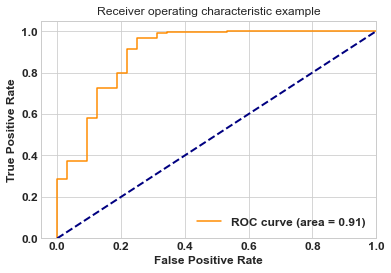

In [818]:
fpr5,tpr5, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])

roc_auc5 = auc(fpr5, tpr5)
plt.plot(fpr5,tpr5,color='darkorange',label='ROC curve (area = %0.2f)' % 0.91)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('Receiver operating characteristic example',fontsize=12)
plt.legend(loc="lower right",fontsize=12)
plt.savefig('ANN_test_ROC.jpg',dpi=600)
plt.show()

# confusion_matrix

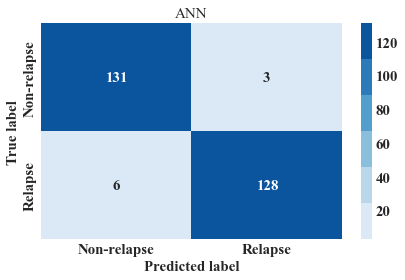

In [645]:
import numpy as np
np.set_printoptions(suppress=True)
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))

plt.rc('font', family='Times New Roman')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

cn = confusion_matrix(y_test, model.predict(X_test))

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

annot_kws={"fontsize":15}
h = sns.heatmap(cn,fmt="d",cmap = sns.color_palette("Blues"),annot_kws={"fontsize":15},xticklabels=['Non-relapse','Relapse'], yticklabels=['Non-relapse','Relapse'], annot=True)

cbar = h.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Predicted label",fontsize=15)
plt.ylabel("True label",fontsize=15)
plt.title("ANN",fontdict={'size': 15})
plt.tight_layout()
plt.savefig('ANN_confusion_matrix.png',dpi=600,bbox_inches="tight")
plt.show()

# NB

# Optimal hyperparameters

In [646]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_resample_train,y_resample_train)
y_pre_NB = nb.predict(X_test)

In [647]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print('accuracy:%.3f'%accuracy_score(y_true=y_test,y_pred=y_pre_NB))
print('Precision:%.3f'%precision_score(y_true=y_test,y_pred=y_pre_NB))
print('recall_score:%.3f'%recall_score(y_true=y_test,y_pred=y_pre_NB))
print('f1_score:%.3f'%f1_score(y_true=y_test,y_pred=y_pre_NB))

accuracy:0.551
Precision:0.976
recall_score:0.493
f1_score:0.664


# AUC

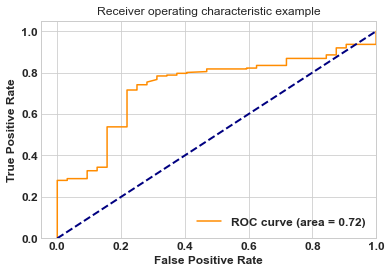

In [814]:
fpr6,tpr6, thresholds = roc_curve(y_test,nb.predict_proba(X_test)[:,1])

roc_auc6 = auc(fpr6, tpr6)
plt.plot(fpr6,tpr6,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc6)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('Receiver operating characteristic example',fontsize=12)
plt.legend(loc="lower right",fontsize=12)
plt.savefig('NB_test_ROC.jpg',dpi=600)
plt.show()

# confusion_matrix

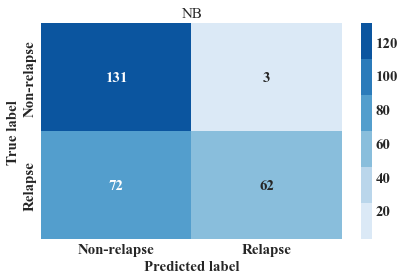

In [735]:
#confusion_matrix
import numpy as np
np.set_printoptions(suppress=True)
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))

plt.rc('font', family='Times New Roman')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

cn = confusion_matrix(y_test, nb.predict(X_test))

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

annot_kws={"fontsize":15}
h = sns.heatmap(cn,fmt="d",cmap = sns.color_palette("Blues"),annot_kws={"fontsize":15},xticklabels=['Non-relapse','Relapse'], yticklabels=['Non-relapse','Relapse'], annot=True)

cbar = h.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Predicted label",fontsize=15)
plt.ylabel("True label",fontsize=15)
plt.title("NB",fontdict={'size': 15})
plt.tight_layout()
plt.savefig('NB_confusion_matrix.png',dpi=600,bbox_inches="tight")
plt.show()

# Comparison of ROC curves of different models

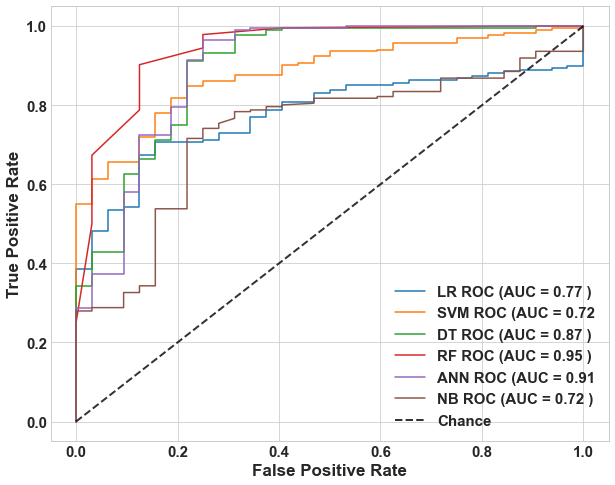

In [815]:
plt.figure(figsize=(10,8))
plt.plot(fpr1, tpr1,)
plt.plot(fpr2, tpr2)  
plt.plot(fpr3, tpr3)       
plt.plot(fpr4, tpr4)        
plt.plot(fpr5, tpr5)        
plt.plot(fpr6, tpr6)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',alpha=.8)
plt.legend(["LR ROC (AUC = %0.2f)"%(roc_auc1),"SVM ROC (AUC = %0.2f)"%(roc_auc2),"DT ROC (AUC = %0.2f)"%(roc_auc3),
            "RF ROC (AUC = %0.2f)"%(roc_auc4),"ANN ROC (AUC = %0.2f)"%(roc_auc5),"NB ROC (AUC = %0.2f)"%(roc_auc6), 
            "Chance"], loc="lower right", fontsize=15)
         

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('False Positive Rate', fontsize=17)
plt.ylabel('True Positive Rate', fontsize=17)
plt.savefig('Models test_ROC.png',dpi=600,bbox_inches="tight")
plt.show()

# RF-importance

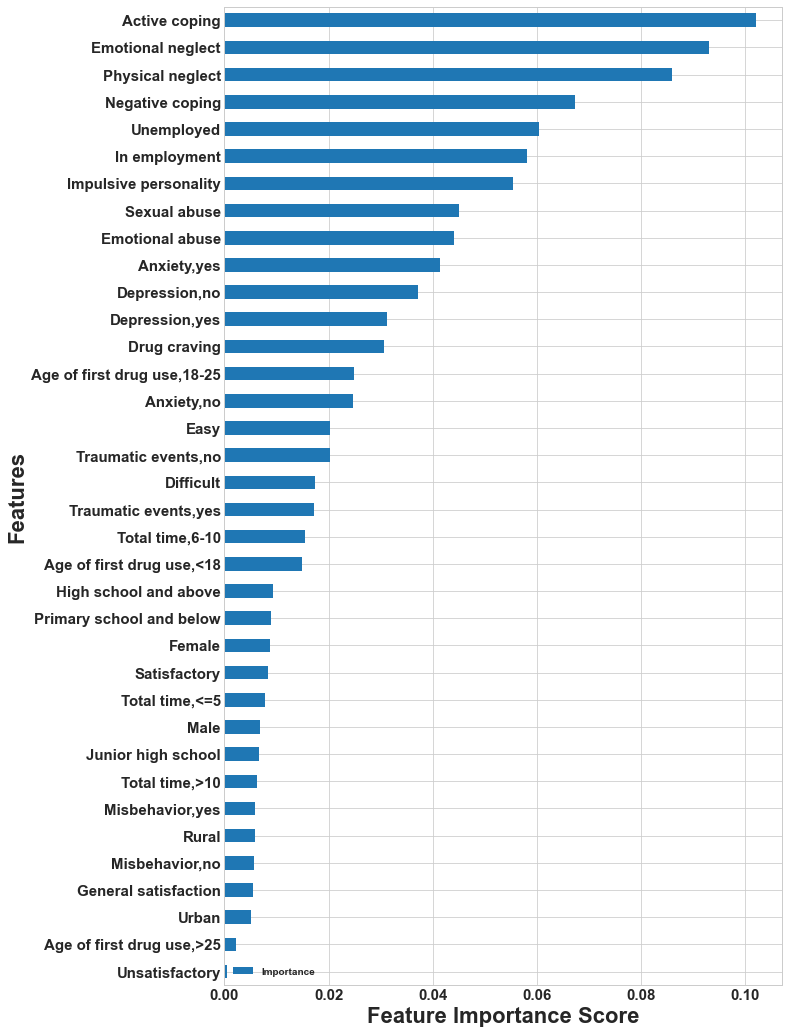

In [91]:
plt.style.use('seaborn-whitegrid')
importance = grid_rf.feature_importances_
importance = pd.DataFrame(importance, index=dataset.drop('Relapse', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(10,len(importance)/2))


font1 = {
# 'weight' : 'normal',
'size' : 15,
}
#legend = plt.legend(handles=[A,B],prop=font1)
plt.tick_params(labelsize=15)


plt.xlabel('Feature Importance Score',fontsize=22)
plt.ylabel('Features',fontsize=22)
#plt.legend(X)
plt.savefig('RF_importance-1.png',dpi=600,bbox_inches="tight")
plt.show()